SDSS plotting provided by Song Huang (UCSC, 2017)

In [1]:
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

__author__ = 'Song Huang'
__email__ = 'shuang89@ucsc.edu'
__version__ = '170503A'

from __future__ import (print_function, division, absolute_import)

import os
import copy
import time
import warnings
import subprocess

import h5py
import numpy as np

# Matplotlib related
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.style.use('classic')
plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

from astropy.io import fits
from astropy.table import \
    Table, \
    Column, \
    vstack
from astropy.utils.metadata import MergeConflictWarning
warnings.filterwarnings('ignore', category=MergeConflictWarning, 
                        append=True)
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.utils.console import ProgressBar
from astropy.convolution import convolve, Box1DKernel

import hsc_massive
from hsc_massive import \
    s16a_path, \
    sample_selection, \
    plotting

#envir = s16a_path.set_env(version='astro4')
envir = s16a_path.set_env(version='kungpao')

ORG = plotting.ORG
BLK = plotting.BLK
BLU = plotting.BLU
GRN = plotting.GRN
PUR = plotting.PUR

## Useful functions

In [41]:
wave_label = r'$\mathrm{Wavelength\ }(\AA)$'
flux_label = r'$\mathrm{Flux}\ (10^{-17}\ \mathrm{erg}/\mathrm{cm}^2/\mathrm{s}/\AA)$'
s2n_label = r'$\mathrm{S}/\mathrm{N}$'

In [23]:
def load_spec_kast_hdf5(hdf5_file):
    hdf5_data = h5py.File(hdf5_file, 'r')
    hdf5_key = hdf5_data.keys()[0]
    hdf5_spec = hdf5_data[hdf5_key][0]
    
    return hdf5_spec[0], hdf5_spec[1], hdf5_spec[2]

# Load the KAST and SDSS spectra

In [36]:
# KAST Red data #
kast_1_file = 'kast/J1617+4232_coadd.hdf5'
kast_1_wave, kast_1_flux, kast_1_sig = load_spec_kast_hdf5(kast_1_file)

kast_2_file = 'kast/J1620+4227_coadd.hdf5'
kast_2_wave, kast_2_flux, kast_2_sig = load_spec_kast_hdf5(kast_2_file)

kast_3_file = 'kast/J2223+0137_coadd.hdf5'
kast_3_wave, kast_3_flux, kast_3_sig = load_spec_kast_hdf5(kast_3_file)

kast_4_file = 'kast/J2240+0053_coadd.hdf5'
kast_4_wave, kast_4_flux, kast_4_sig = load_spec_kast_hdf5(kast_4_file)

# SDSS spectra #
sdss_1_name = r'$\mathrm{SDSS\ J1617+4232}$'
sdss_1 = os.path.join('sdss/spec-6035-56076-0453.fits')
sdss_1_z = 0.441
sdss_1_spec = fits.open(sdss_1)[1].data
sdss_1_logw = sdss_1_spec['loglam']
sdss_1_wave = 10.0 ** sdss_1_logw
sdss_1_flux = sdss_1_spec['flux']
sdss_1_model = sdss_1_spec['model']

sdss_2_name = r'$\mathrm{SDSS\ J1620+4227}$'
sdss_2 = os.path.join('sdss/spec-0815-52374-0293.fits')
sdss_2_z = 0.474 
sdss_2_spec = fits.open(sdss_2)[1].data
sdss_2_logw = sdss_2_spec['loglam']
sdss_2_wave = 10.0 ** sdss_2_logw
sdss_2_flux = sdss_2_spec['flux']
sdss_2_model = sdss_2_spec['model']

sdss_3_name = r'$\mathrm{SDSS\ J2223+0137}$'
sdss_3 = os.path.join('sdss/spec-4322-55503-0264.fits')
sdss_3_z = 0.370 
sdss_3_spec = fits.open(sdss_3)[1].data
sdss_3_logw = sdss_3_spec['loglam']
sdss_3_wave = 10.0 ** sdss_3_logw
sdss_3_flux = sdss_3_spec['flux']
sdss_3_model = sdss_3_spec['model']

sdss_4_name = r'$\mathrm{SDSS\ J2240+0053}$'
sdss_4 = os.path.join('sdss/spec-1037-52878-0576.fits')
sdss_4_z = 0.362 
sdss_4_spec = fits.open(sdss_4)[1].data
sdss_4_logw = sdss_4_spec['loglam']
sdss_4_wave = 10.0 ** sdss_4_logw
sdss_4_flux = sdss_4_spec['flux']
sdss_4_model = sdss_4_spec['model']

# Plot the spectrum

## J1617+4232

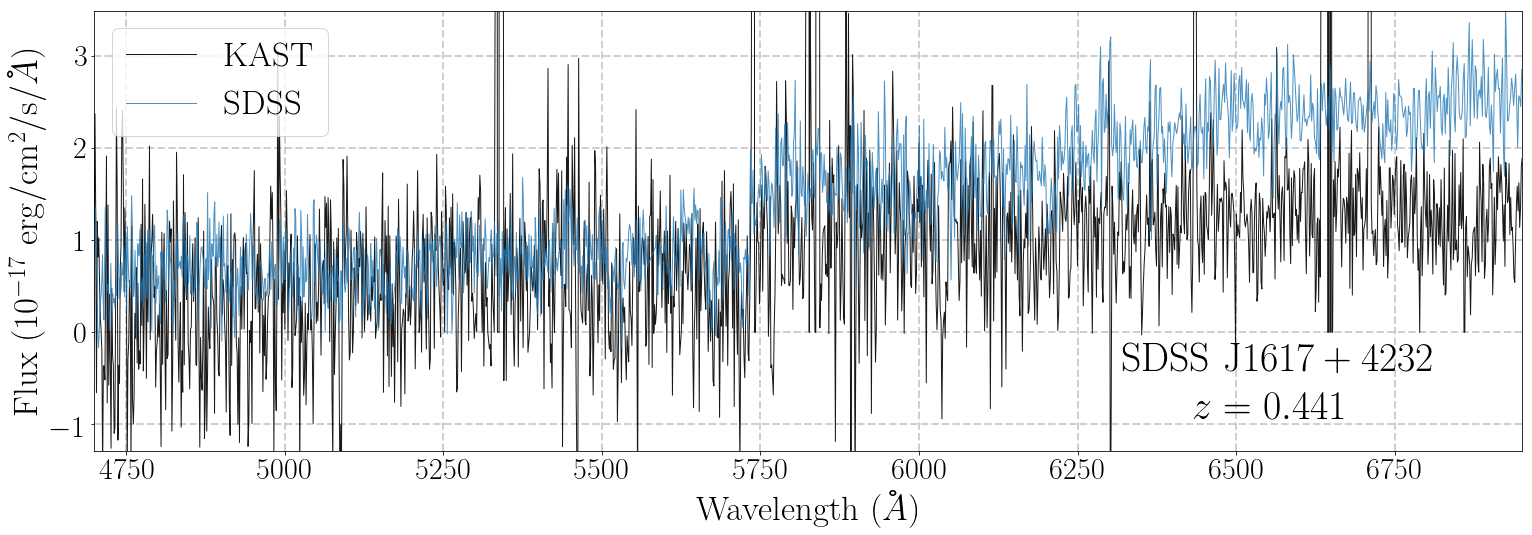

In [31]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(kast_1_wave, kast_1_flux, linewidth=1.0, color='k', label=r'$\mathrm{KAST}$', alpha=0.9)

ax1.plot(sdss_1_wave, sdss_1_flux, linewidth=1.0, label=r'$\mathrm{SDSS}$', 
         alpha=0.8)
#ax1.plot(sdss_1_wave, sdss_1_model, linewidth=4.0, label=r'$\mathrm{Model}$')

# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(4700.0, 6950.0)
ax1.set_ylim(-1.29, 3.49)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(flux_label, fontsize=35)

ax1.legend(fontsize=35)

ax1.text(0.72, 0.18, sdss_1_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_1_z, fontsize=40, 
         transform=ax1.transAxes)

fig.savefig('J1617+4232_coadd.png', dpi=100)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


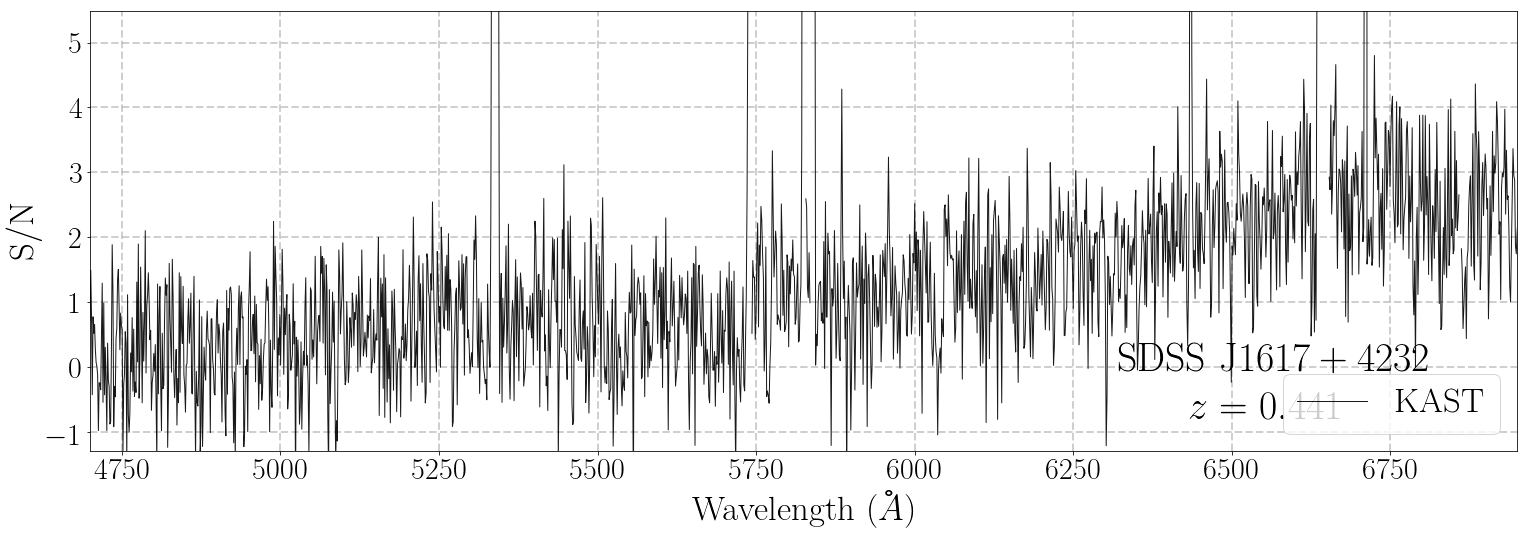

In [42]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(kast_1_wave, kast_1_flux / kast_1_sig, linewidth=1.0, color='k', 
         label=r'$\mathrm{KAST}$', alpha=0.9)


# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(4700.0, 6950.0)
ax1.set_ylim(-1.29, 5.49)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(s2n_label, fontsize=35)

ax1.legend(fontsize=35)

ax1.text(0.72, 0.18, sdss_1_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_1_z, fontsize=40, 
         transform=ax1.transAxes)

#fig.savefig('J1617+4232_coadd.png', dpi=100)

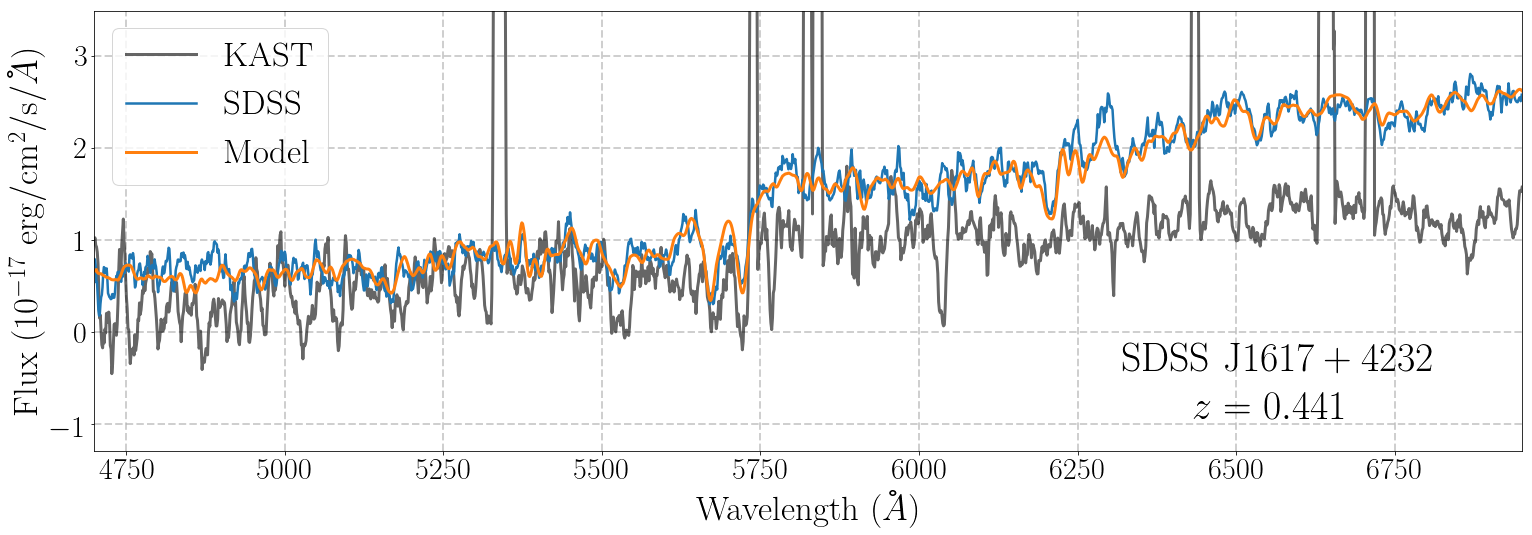

In [32]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(kast_1_wave, convolve(kast_1_flux, Box1DKernel(9)), linewidth=3.0, color='k', 
         label=r'$\mathrm{KAST}$', alpha=0.6)

ax1.plot(sdss_1_wave, convolve(sdss_1_flux, Box1DKernel(7)), linewidth=2.5, 
         label=r'$\mathrm{SDSS}$', 
         alpha=1.0)

ax1.plot(sdss_1_wave, sdss_1_model, linewidth=3.0, 
         alpha=1.0, label=r'$\mathrm{Model}$')


# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(4700.0, 6950.0)
ax1.set_ylim(-1.29, 3.49)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(flux_label, fontsize=35)

ax1.legend(fontsize=35)

ax1.text(0.72, 0.18, sdss_1_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_1_z, fontsize=40, 
         transform=ax1.transAxes)

#fig.savefig('J1617+4232_coadd_smooth.png', dpi=100)

## J1620+4227

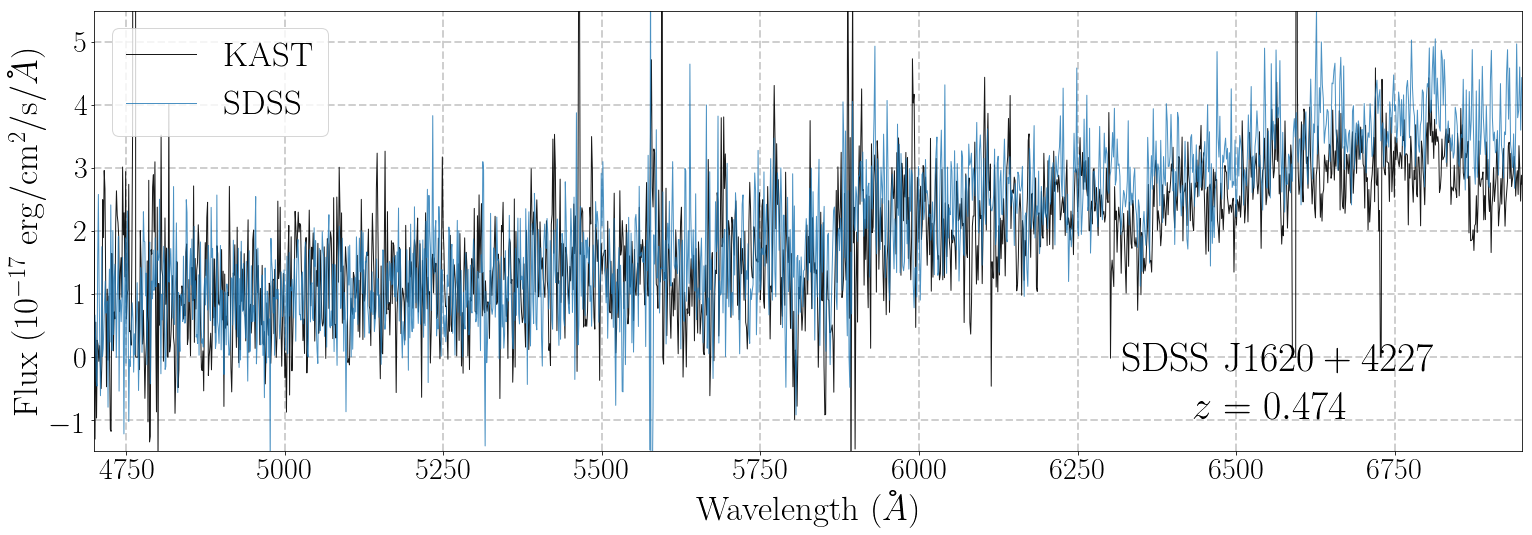

In [38]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(kast_2_wave, kast_2_flux, linewidth=1.0, color='k', label=r'$\mathrm{KAST}$', alpha=0.9)

ax1.plot(sdss_2_wave, sdss_2_flux, linewidth=1.0, label=r'$\mathrm{SDSS}$', 
         alpha=0.8)

# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(4700.0, 6950.0)
ax1.set_ylim(-1.49, 5.49)


ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(flux_label, fontsize=35)

ax1.legend(fontsize=35, loc='upper left')

ax1.text(0.72, 0.18, sdss_2_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_2_z, fontsize=40, 
         transform=ax1.transAxes)

fig.savefig('J1620+4227_coadd.png', dpi=100)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


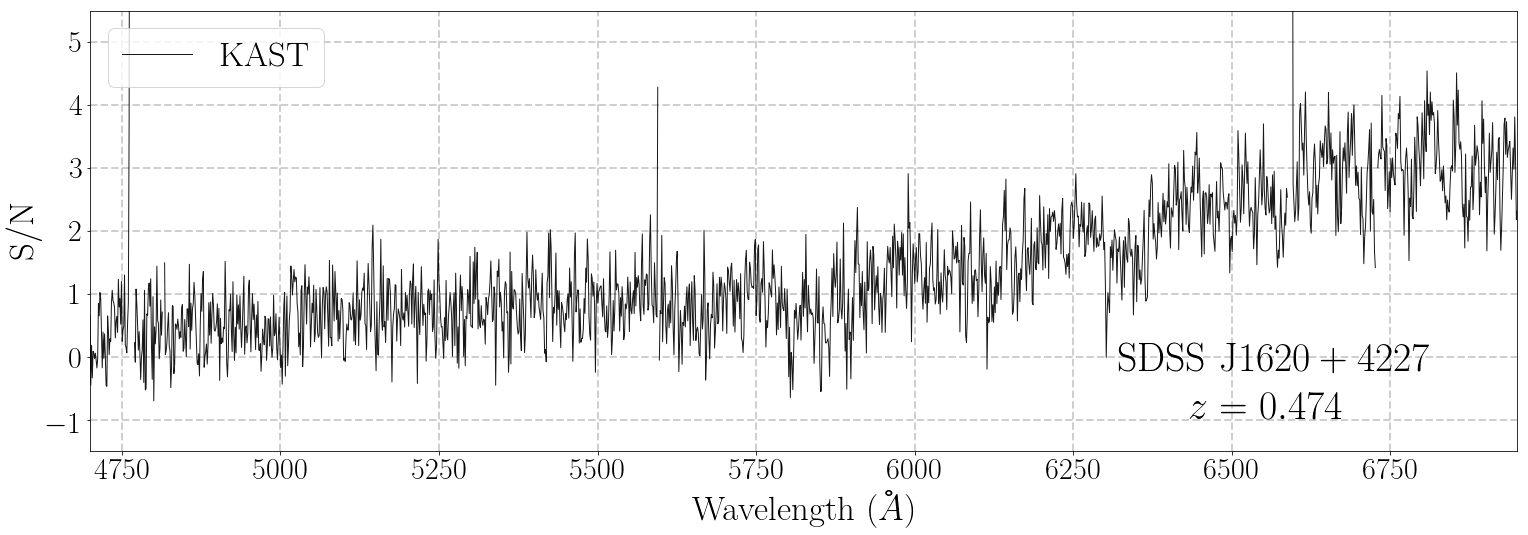

In [43]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(kast_2_wave, kast_2_flux / kast_2_sig, linewidth=1.0, color='k', label=r'$\mathrm{KAST}$', alpha=0.9)

# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(4700.0, 6950.0)
ax1.set_ylim(-1.49, 5.49)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(s2n_label, fontsize=35)

ax1.legend(fontsize=35, loc='upper left')

ax1.text(0.72, 0.18, sdss_2_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_2_z, fontsize=40, 
         transform=ax1.transAxes)

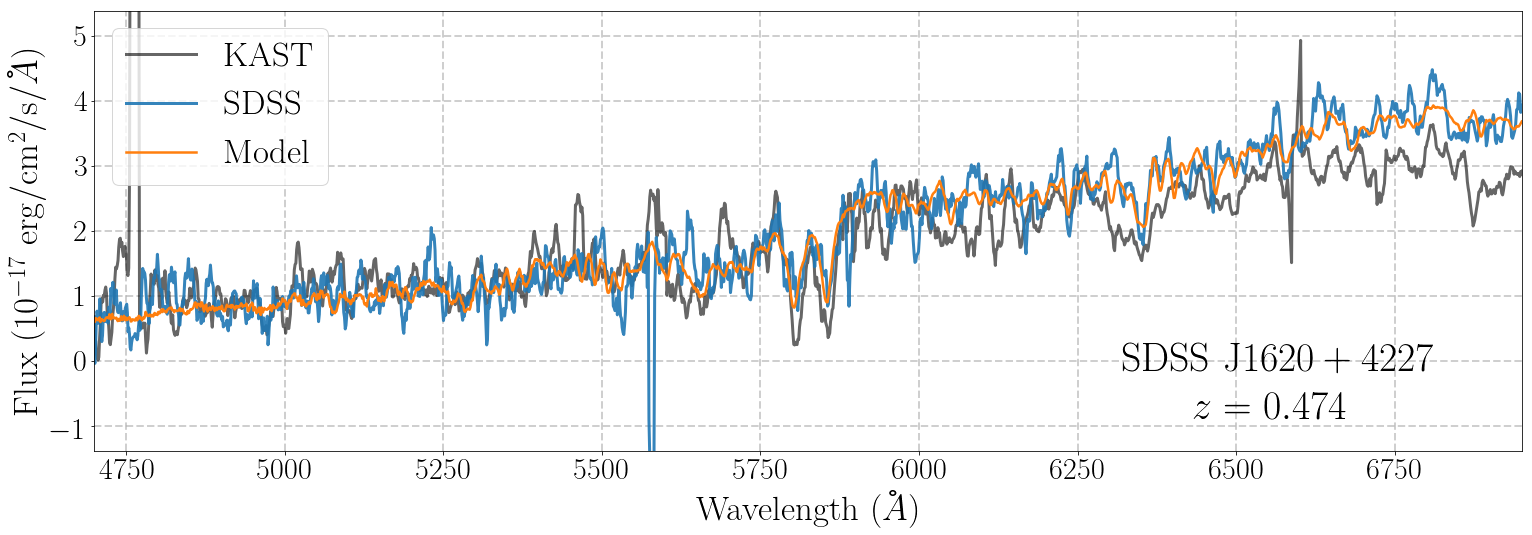

In [39]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(kast_2_wave, convolve(kast_2_flux, Box1DKernel(11)), linewidth=3.0, color='k', 
         label=r'$\mathrm{KAST}$', alpha=0.6)

ax1.plot(sdss_2_wave, convolve(sdss_2_flux, Box1DKernel(7)), linewidth=3.0, 
         label=r'$\mathrm{SDSS}$', 
         alpha=0.9)

ax1.plot(sdss_2_wave, sdss_2_model, linewidth=2.5, label=r'$\mathrm{Model}$')


# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(4700.0, 6950.0)
ax1.set_ylim(-1.39, 5.39)


ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(flux_label, fontsize=35)

ax1.legend(fontsize=35, loc='upper left')

ax1.text(0.72, 0.18, sdss_2_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_2_z, fontsize=40, 
         transform=ax1.transAxes)

fig.savefig('J1620+4227_coadd_smooth.png', dpi=100)

## J2223+0137

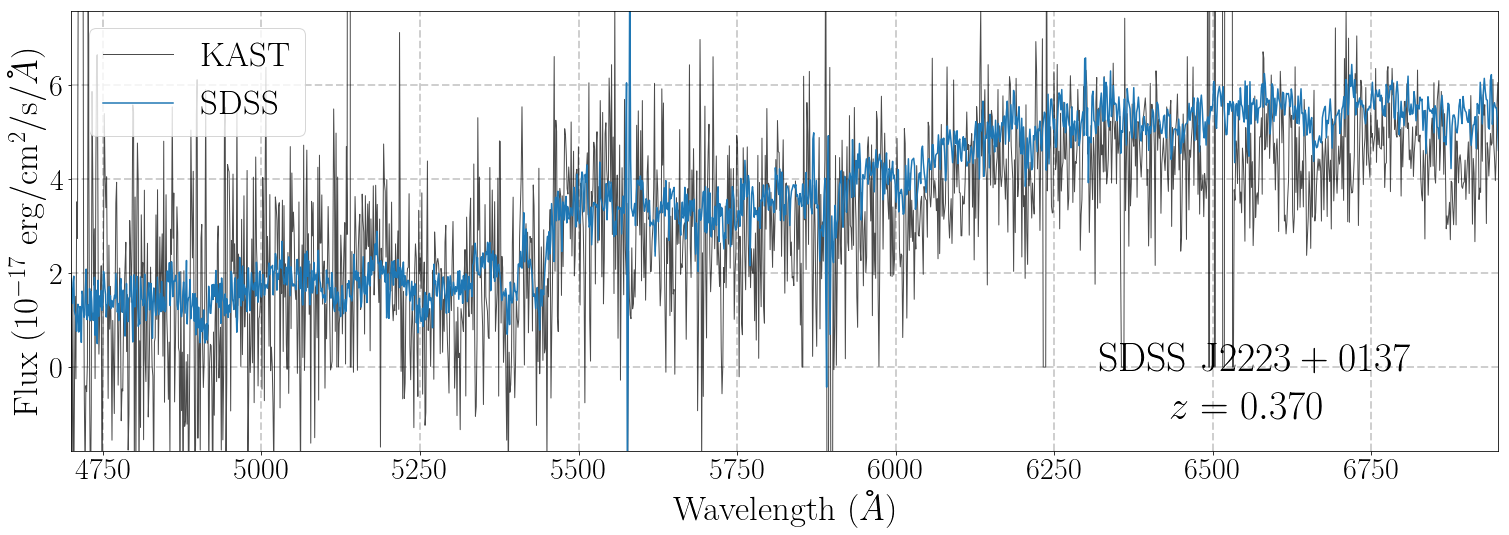

In [44]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(kast_3_wave, kast_3_flux, linewidth=1.0, color='k', label=r'$\mathrm{KAST}$', alpha=0.7)

ax1.plot(sdss_3_wave, sdss_3_flux, linewidth=1.5, label=r'$\mathrm{SDSS}$', 
         alpha=1.0)

# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(4700.0, 6950.0)
ax1.set_ylim(-1.79, 7.59)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(flux_label, fontsize=35)

ax1.legend(fontsize=35, loc='upper left')

ax1.text(0.72, 0.18, sdss_3_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_3_z, fontsize=40, 
         transform=ax1.transAxes)

fig.savefig('J2223+0137_coadd.png', dpi=100)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


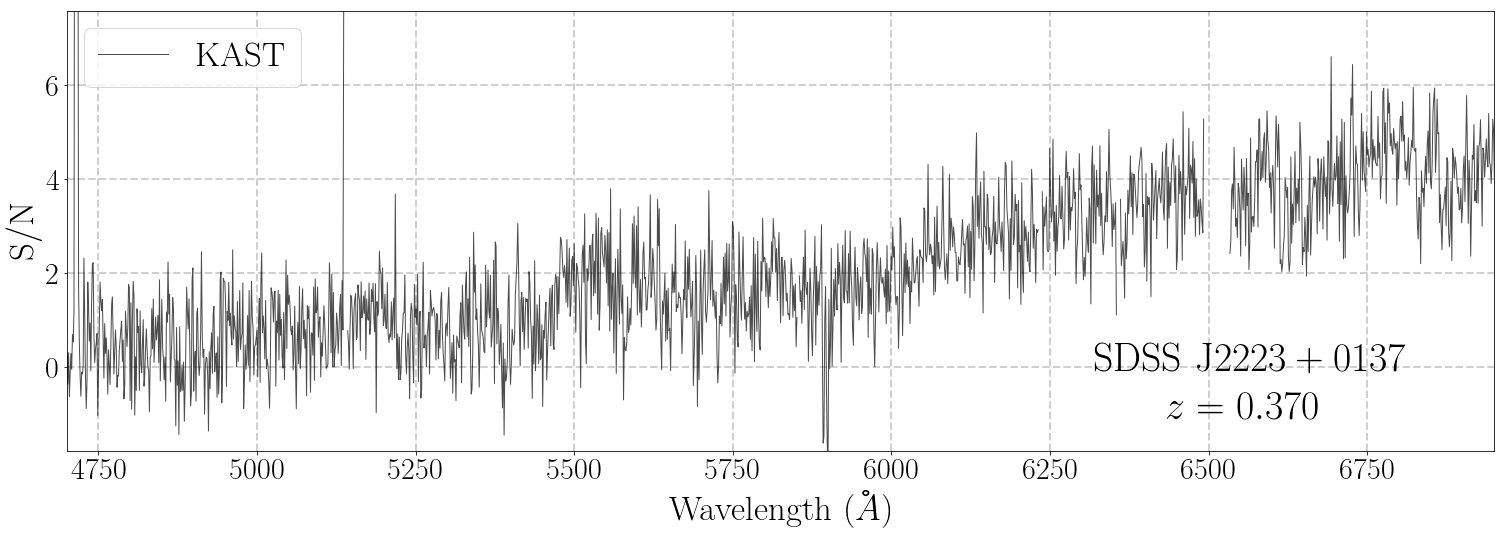

In [46]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(kast_3_wave, kast_3_flux / kast_3_sig, linewidth=1.0, color='k', 
         label=r'$\mathrm{KAST}$', alpha=0.7)

# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(4700.0, 6950.0)
ax1.set_ylim(-1.79, 7.59)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(s2n_label, fontsize=35)

ax1.legend(fontsize=35, loc='upper left')

ax1.text(0.72, 0.18, sdss_3_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_3_z, fontsize=40, 
         transform=ax1.transAxes)

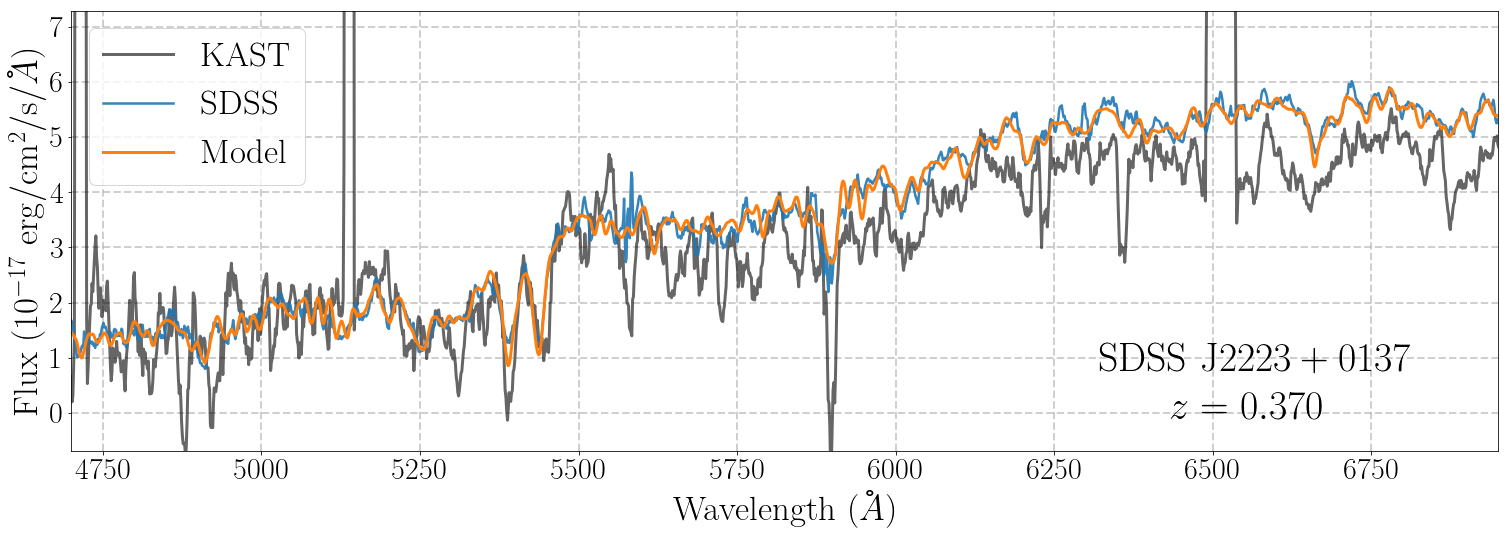

In [45]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(kast_3_wave, convolve(kast_3_flux, Box1DKernel(11)), linewidth=3.0, color='k', 
         label=r'$\mathrm{KAST}$', alpha=0.6)

ax1.plot(sdss_3_wave, convolve(sdss_3_flux, Box1DKernel(7)), linewidth=2.5, 
         label=r'$\mathrm{SDSS}$', 
         alpha=0.9)

ax1.plot(sdss_3_wave, sdss_3_model, linewidth=3.0, 
         alpha=1.0, label=r'$\mathrm{Model}$')

# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(4700.0, 6950.0)
ax1.set_ylim(-0.69, 7.29)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(flux_label, fontsize=35)

ax1.legend(fontsize=35, loc='upper left')

ax1.text(0.72, 0.18, sdss_3_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_3_z, fontsize=40, 
         transform=ax1.transAxes)

fig.savefig('J2223+0137_coadd_smooth.png', dpi=100)

## J2240+0053

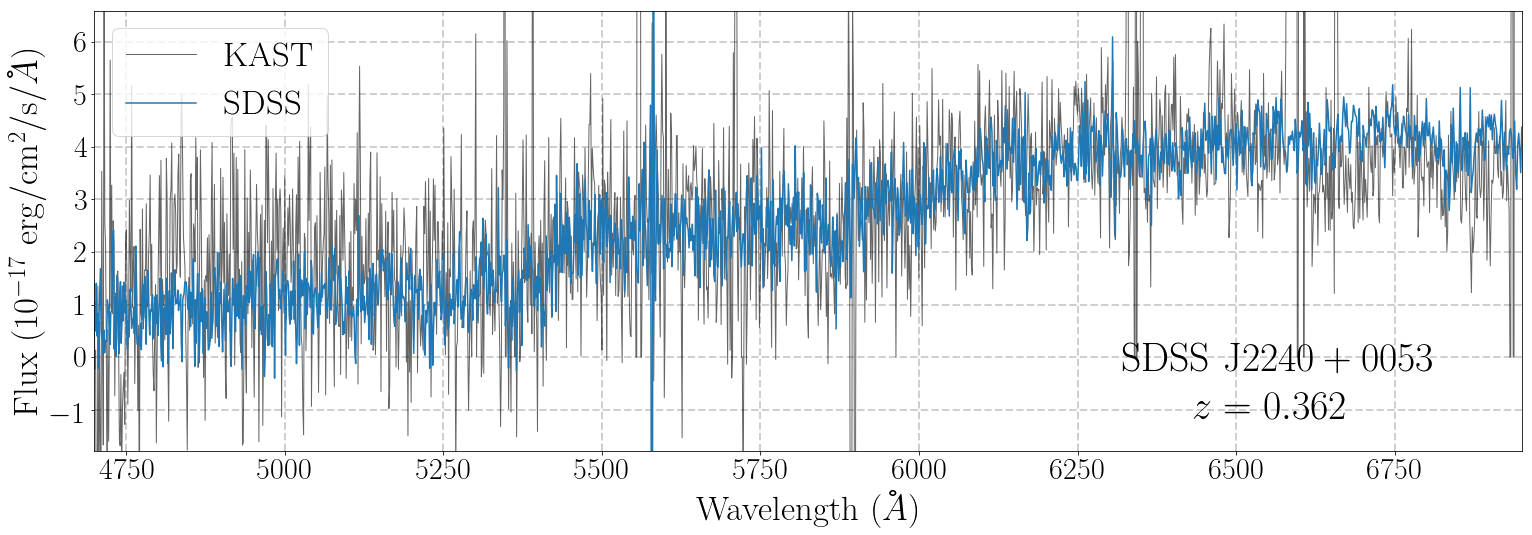

In [47]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(kast_4_wave, kast_4_flux, linewidth=1.0, color='k', label=r'$\mathrm{KAST}$', alpha=0.6)

ax1.plot(sdss_4_wave, sdss_4_flux, linewidth=1.5, label=r'$\mathrm{SDSS}$', 
         alpha=1.0)

# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(4700.0, 6950.0)
ax1.set_ylim(-1.79, 6.59)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(flux_label, fontsize=35)

ax1.legend(fontsize=35, loc='upper left')

ax1.text(0.72, 0.18, sdss_4_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_4_z, fontsize=40, 
         transform=ax1.transAxes)

fig.savefig('J2240+0053_coadd.png', dpi=100)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


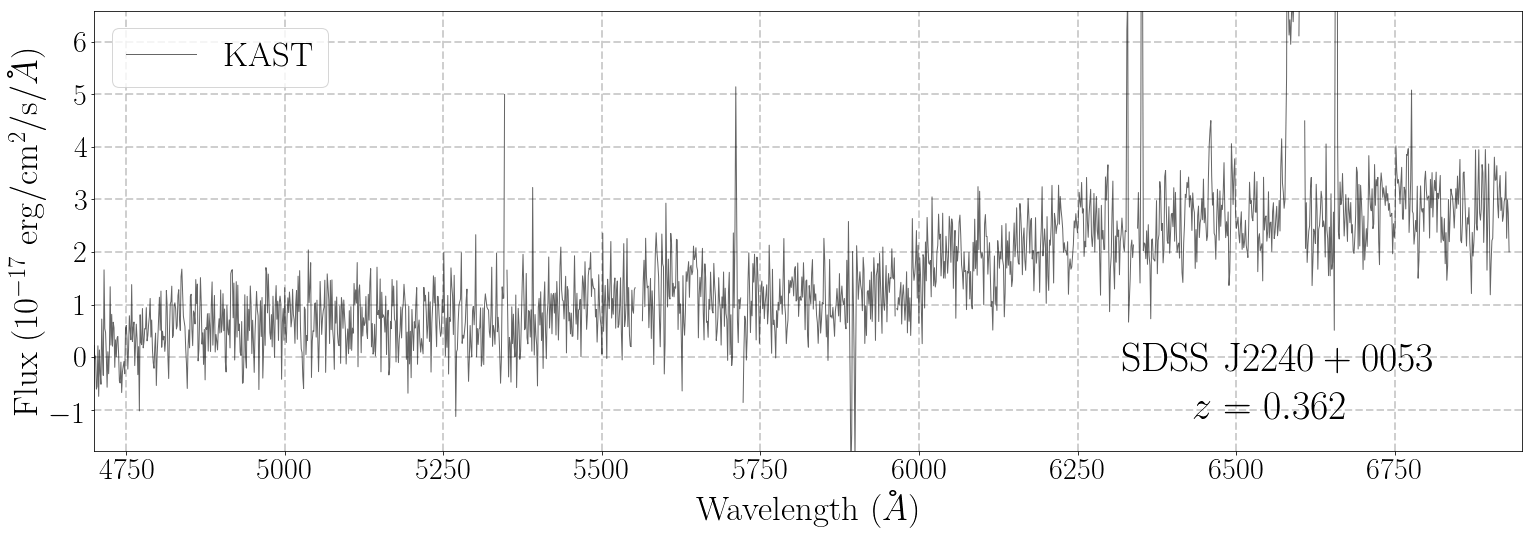

In [49]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(kast_4_wave, kast_4_flux / kast_4_sig, linewidth=1.0, color='k', 
         label=r'$\mathrm{KAST}$', alpha=0.6)

# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(4700.0, 6950.0)
ax1.set_ylim(-1.79, 6.59)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(flux_label, fontsize=35)

ax1.legend(fontsize=35, loc='upper left')

ax1.text(0.72, 0.18, sdss_4_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_4_z, fontsize=40, 
         transform=ax1.transAxes)

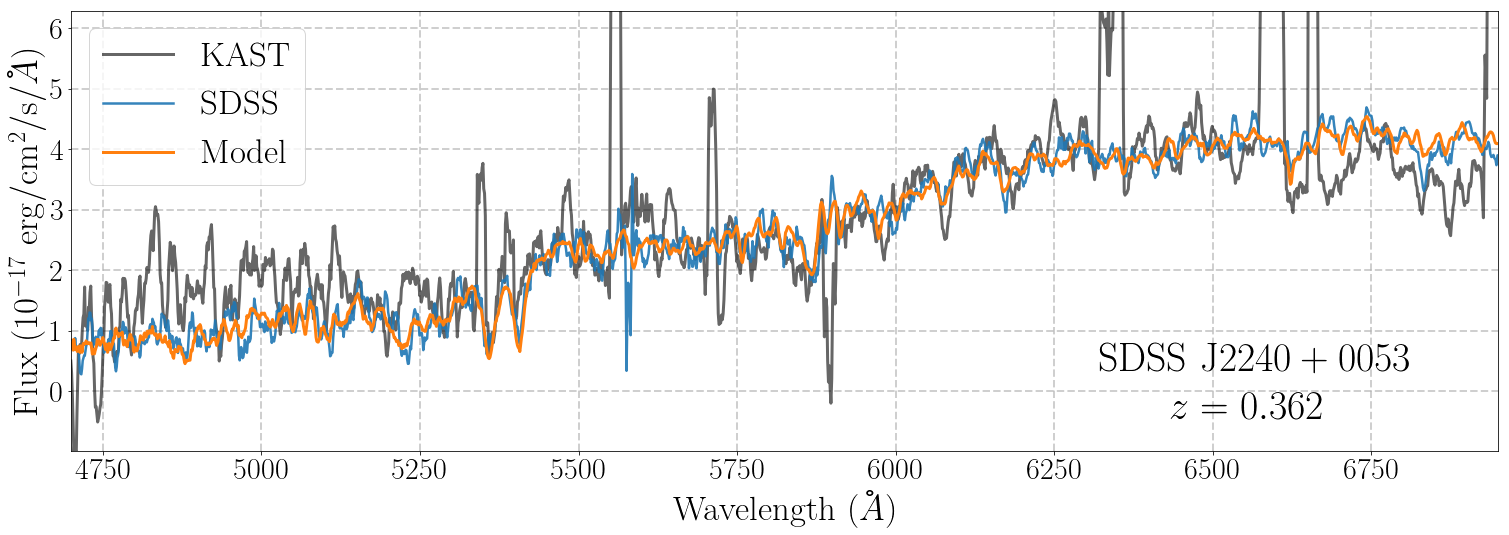

In [48]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(kast_4_wave, convolve(kast_4_flux, Box1DKernel(11)), linewidth=3.0, color='k', 
         label=r'$\mathrm{KAST}$', alpha=0.6)

ax1.plot(sdss_4_wave, convolve(sdss_4_flux, Box1DKernel(7)), linewidth=2.5, 
         label=r'$\mathrm{SDSS}$', 
         alpha=0.9)

ax1.plot(sdss_4_wave, sdss_4_model, linewidth=3.0, 
         alpha=1.0, label=r'$\mathrm{Model}$')

# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(4700.0, 6950.0)
ax1.set_ylim(-0.99, 6.29)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(flux_label, fontsize=35)

ax1.legend(fontsize=35, loc='upper left')

ax1.text(0.72, 0.18, sdss_4_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_4_z, fontsize=40, 
         transform=ax1.transAxes)

fig.savefig('J2240+0053_coadd_smooth.png', dpi=100)

# Sigma-clipping and clean the spectra

In [71]:
from astropy.stats import sigma_clip

In [88]:
wave_mask = ((kast_1_wave > 4750) & (kast_1_wave < 6900))

kast_1_wave_use = kast_1_wave[wave_mask]
kast_1_flux_use = kast_1_flux[wave_mask]
kast_1_sig_use = kast_1_sig[wave_mask]

wave_mask = ((kast_2_wave > 4750) & (kast_2_wave < 6900))

kast_2_wave_use = kast_2_wave[wave_mask]
kast_2_flux_use = kast_2_flux[wave_mask]
kast_2_sig_use = kast_2_sig[wave_mask]

wave_mask = ((kast_3_wave > 4750) & (kast_3_wave < 6900))

kast_3_wave_use = kast_3_wave[wave_mask]
kast_3_flux_use = kast_3_flux[wave_mask]
kast_3_sig_use = kast_3_sig[wave_mask]

wave_mask = ((kast_4_wave > 4750) & (kast_4_wave < 6900))

kast_4_wave_use = kast_4_wave[wave_mask]
kast_4_flux_use = kast_4_flux[wave_mask]
kast_4_sig_use = kast_4_sig[wave_mask]

In [106]:
kast_1_flux_clip = sigma_clip(kast_1_flux_use, iters=5, 
                              stdfunc=np.nanstd,
                              cenfunc=np.nanmedian, 
                              sigma_lower=3, sigma_upper=3)
kast_1_flux_mask = kast_1_flux_clip.mask

kast_2_flux_clip = sigma_clip(kast_2_flux_use, iters=5, 
                              stdfunc=np.nanstd,
                              cenfunc=np.nanmedian, 
                              sigma_lower=3, sigma_upper=3)
kast_2_flux_mask = kast_2_flux_clip.mask

kast_3_flux_clip = sigma_clip(kast_3_flux_use, iters=5, 
                              stdfunc=np.nanstd,
                              cenfunc=np.nanmedian, 
                              sigma_lower=3, sigma_upper=3)
kast_3_flux_mask = kast_3_flux_clip.mask

kast_4_flux_clip = sigma_clip(kast_4_flux_use, iters=5, 
                              stdfunc=np.nanstd,
                              cenfunc=np.nanmedian, 
                              sigma_lower=3, sigma_upper=3)
kast_4_flux_mask = kast_4_flux_clip.mask

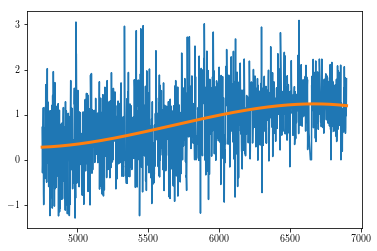

In [108]:
kast_1_poly_1d = np.poly1d(np.polyfit(kast_1_wave_use[~kast_1_flux_clip.mask], 
                                      kast_1_flux_use[~kast_1_flux_clip.mask], 3))
kast_1_poly_cont = kast_1_poly_1d(kast_1_wave_use)

plt.plot(kast_1_wave_use[~kast_1_flux_clip.mask], 
         kast_1_flux_use[~kast_1_flux_clip.mask])

plt.plot(kast_1_wave_use, 
         kast_1_poly_cont, linewidth=3)

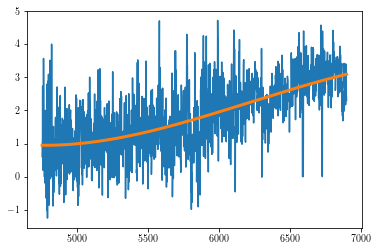

In [111]:
kast_2_poly_1d = np.poly1d(np.polyfit(kast_2_wave_use[~kast_2_flux_clip.mask], 
                                      kast_2_flux_use[~kast_2_flux_clip.mask], 3))
kast_2_poly_cont = kast_2_poly_1d(kast_2_wave_use)

plt.plot(kast_2_wave_use[~kast_2_flux_clip.mask], 
         kast_2_flux_use[~kast_2_flux_clip.mask])

plt.plot(kast_2_wave_use, 
         kast_2_poly_cont, linewidth=3)

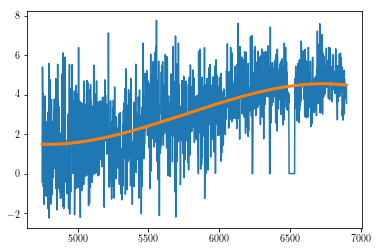

In [110]:
kast_3_poly_1d = np.poly1d(np.polyfit(kast_3_wave_use[~kast_3_flux_clip.mask], 
                                      kast_3_flux_use[~kast_3_flux_clip.mask], 3))
kast_3_poly_cont = kast_3_poly_1d(kast_3_wave_use)

plt.plot(kast_3_wave_use[~kast_3_flux_clip.mask], 
         kast_3_flux_use[~kast_3_flux_clip.mask])

plt.plot(kast_3_wave_use, 
         kast_3_poly_cont, linewidth=3)

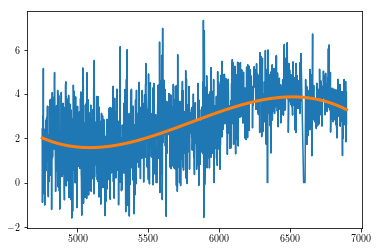

In [112]:
kast_4_poly_1d = np.poly1d(np.polyfit(kast_4_wave_use[~kast_4_flux_clip.mask], 
                                      kast_4_flux_use[~kast_4_flux_clip.mask], 3))
kast_4_poly_cont = kast_4_poly_1d(kast_4_wave_use)

plt.plot(kast_4_wave_use[~kast_4_flux_clip.mask], 
         kast_4_flux_use[~kast_4_flux_clip.mask])

plt.plot(kast_4_wave_use, 
         kast_4_poly_cont, linewidth=3)

In [120]:
kast_1_flux_clip = sigma_clip(kast_1_flux_use - kast_1_poly_cont, iters=5, 
                              stdfunc=np.nanstd,
                              cenfunc=np.nanmedian, 
                              sigma_lower=3, sigma_upper=3)
kast_1_flux_mask = kast_1_flux_clip.mask
print(np.sum(kast_1_flux_mask))

kast_2_flux_clip = sigma_clip(kast_2_flux_use - kast_2_poly_cont, iters=5, 
                              stdfunc=np.nanstd,
                              cenfunc=np.nanmedian, 
                              sigma_lower=3, sigma_upper=3)
kast_2_flux_mask = kast_2_flux_clip.mask
print(np.sum(kast_2_flux_mask))

kast_3_flux_clip = sigma_clip(kast_3_flux_use - kast_3_poly_cont, iters=5, 
                              stdfunc=np.nanstd,
                              cenfunc=np.nanmedian, 
                              sigma_lower=3, sigma_upper=3)
kast_3_flux_mask = kast_3_flux_clip.mask
print(np.sum(kast_3_flux_mask))

kast_4_flux_clip = sigma_clip(kast_4_flux_use - kast_4_poly_cont, iters=5, 
                              stdfunc=np.nanstd,
                              cenfunc=np.nanmedian, 
                              sigma_lower=3, sigma_upper=3)
kast_4_flux_mask = kast_4_flux_clip.mask
print(np.sum(kast_4_flux_mask))

57
47
45
63


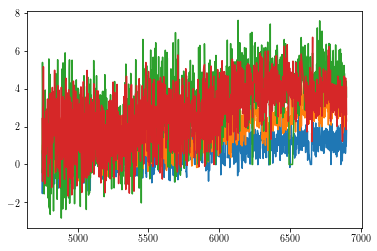

In [124]:
plt.plot(kast_1_wave_use[~kast_1_flux_clip.mask], 
         kast_1_flux_use[~kast_1_flux_clip.mask])

plt.plot(kast_2_wave_use[~kast_2_flux_clip.mask], 
         kast_2_flux_use[~kast_2_flux_clip.mask])

plt.plot(kast_3_wave_use[~kast_3_flux_clip.mask], 
         kast_3_flux_use[~kast_3_flux_clip.mask])

plt.plot(kast_4_wave_use[~kast_4_flux_clip.mask], 
         kast_4_flux_use[~kast_4_flux_clip.mask])